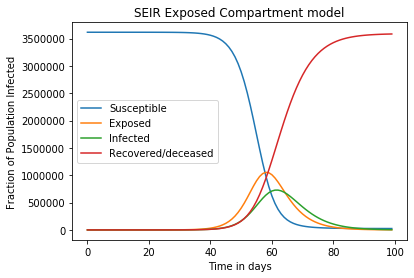

In [32]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

def deriv(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

N = 3616662
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days
R_0 = 5.0
beta = R_0 * gamma  # R_0 = beta / gamma, so beta = R_0 * gamma
S0, E0, I0, R0 = N-1, 1, 0, 0  # initial conditions: one exposed

y0 = S0, E0, I0, R0

t = np.linspace(0, 99, 100)

ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta))
S, E, I, R = ret.T

plt.plot(t,S,label = 'Susceptible');
plt.plot(t,E,label = 'Exposed');
plt.plot(t,I,label = 'Infected');
plt.plot(t,R,label = 'Recovered/deceased');
plt.xlabel("Time in days");
plt.ylabel("Fraction of Population Infected");
plt.title("SEIR Exposed Compartment model")
plt.legend(loc='best')
plt.savefig('SEIR_Example.png')
plt.show()

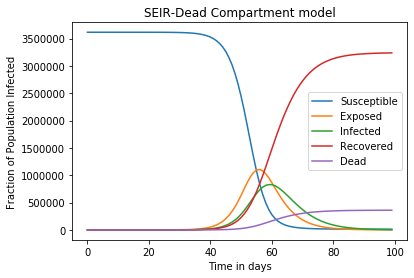

In [33]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt
N = 3616662
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days
R_0 = 5.0
beta = R_0 * gamma  # R_0 = beta / gamma, so beta = R_0 * gamma
alpha = 0.2  # 20% death rate
rho = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T
plt.plot(t,S,label = 'Susceptible');
plt.plot(t,E,label = 'Exposed');
plt.plot(t,I,label = 'Infected');
plt.plot(t,R,label = 'Recovered');
plt.plot(t,D,label='Dead')
plt.xlabel("Time in days");
plt.ylabel("Fraction of Population Infected");
plt.title("SEIR-Dead Compartment model")
plt.legend(loc='best')
plt.savefig('SEIR_Example1.png')
plt.show()